# Notebook for Feature Engineering

This notebook will contain a few steps to get the data ready for model training

1. Data Cleaning (removing nulls, and other bad data)
2. Feature Engineering (creating target features AUC+IC50)
3. Creating Train Test Splits (including leave out drugs and leave out cell lines)

In [1]:
import pyspark
import pandas as pd

# load in the merged dataframe, containing GDSC1, GDSC2, and cell line metadata
gdsc_merged = pd.read_csv("GDSC1and2_w_CellLineData.csv")
df = gdsc_merged
gdsc_merged.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,LN_IC50,AUC,RMSE,Z_SCORE,Sample Name,GDSC_Tissue_descriptor_1,GDSC_Tissue_descriptor_2,Cancer_Type_TCGA,Medium,Growth
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,...,3.966813,0.985678,0.026081,1.299144,ES5,bone,ewings_sarcoma,NaN,R,Adherent
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,...,2.692090,0.972690,0.110059,0.156076,ES7,bone,ewings_sarcoma,NaN,R,Adherent
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,...,2.477990,0.944459,0.087019,-0.035912,EW-11,bone,ewings_sarcoma,NaN,R,Adherent
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,...,2.033564,0.950758,0.016290,-0.434437,SK-ES-1,bone,ewings_sarcoma,NaN,R,Semi-Adherent
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,...,2.966007,0.954778,0.180255,0.401702,COLO-829,skin,melanoma,SKCM,R,Adherent


In [2]:
gdsc_merged[gdsc_merged['DRUG_NAME'] == 'Etoposide']

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,LN_IC50,AUC,RMSE,Z_SCORE,Sample Name,GDSC_Tissue_descriptor_1,GDSC_Tissue_descriptor_2,Cancer_Type_TCGA,Medium,Growth
17096,GDSC1,342,15579856,683667,PFSK-1,SIDM01132,MB,134,Etoposide,TOP2,...,3.130794,0.906829,0.075721,0.802364,PFSK-1,nervous_system,medulloblastoma,MB,R,Adherent
17097,GDSC1,342,15580187,684052,A673,SIDM00848,UNCLASSIFIED,134,Etoposide,TOP2,...,0.899709,0.647650,0.064998,-0.338064,A673,soft_tissue,rhabdomyosarcoma,NaN,D/F12,Adherent
17098,GDSC1,342,15580548,684057,ES5,SIDM00263,UNCLASSIFIED,134,Etoposide,TOP2,...,3.641817,0.913505,0.176287,1.063575,ES5,bone,ewings_sarcoma,NaN,R,Adherent
17099,GDSC1,342,15580920,684059,ES7,SIDM00269,UNCLASSIFIED,134,Etoposide,TOP2,...,-0.264232,0.458997,0.097180,-0.933017,ES7,bone,ewings_sarcoma,NaN,R,Adherent
17100,GDSC1,342,15581313,684062,EW-11,SIDM00203,UNCLASSIFIED,134,Etoposide,TOP2,...,1.412221,0.690411,0.099670,-0.076092,EW-11,bone,ewings_sarcoma,NaN,R,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,GDSC1,342,15899619,1331040,SUP-M2,SIDM00421,UNCLASSIFIED,134,Etoposide,TOP2,...,-0.725258,0.374857,0.111511,-1.168672,SUP-M2,lymphoma,anaplastic_large_cell_lymphoma,NaN,R,Suspension
17971,GDSC1,342,15900007,1331045,TK,SIDM00323,DLBC,134,Etoposide,TOP2,...,1.919947,0.799526,0.110878,0.183435,TK,lymphoma,B_cell_lymphoma,DLBC,R,Suspension
17972,GDSC1,342,15900380,1331048,VAL,SIDM00416,DLBC,134,Etoposide,TOP2,...,2.483716,0.832966,0.187397,0.471607,VAL,lymphoma,B_cell_lymphoma,DLBC,R,Suspension
17973,GDSC1,342,15900744,1331049,WIL2-NS,SIDM01102,UNCLASSIFIED,134,Etoposide,TOP2,...,-0.930156,0.339974,0.057107,-1.273406,WIL2-NS,lymphoma,lymphoid_neoplasm other,NaN,R,Suspension


## Data Cleaning

## Feature Engineering

## Creation of Interaction Term IC50 + AUC

In this segment we create sensitivity, disagreement and weighted averages for these terms. The goal is to have two metric targets and be able to train with either a dual output approach or a singlet output with weighted averages. I'll let the training team decided which to use or go with the one with better performance.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["z_LN_IC50", "z_AUC"]] = scaler.fit_transform(df[["LN_IC50", "AUC"]])

# For interpretability: low LN_IC50 = sensitive, low AUC = sensitive
df["z_IC50_sens"] = df["z_LN_IC50"]


# Sensitivity (average of both)
df["sensitivity"] = (df["z_IC50_sens"] + df["z_AUC"]) / 2

# Disagreement (difference between metrics)
df["disagreement"] = df["z_AUC"] - df["z_IC50_sens"]


# Weighted averages of both metrics for different α
alphas = [0.25, 0.5, 0.75]
for a in alphas:
    df[f"y_weighted_{a}"] = a * df["z_IC50_sens"] + (1 - a) * df["z_AUC"]

df.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,Medium,Growth,z_LN_IC50,z_AUC,z_IC50_sens,sensitivity,disagreement,y_weighted_0.25,y_weighted_0.5,y_weighted_0.75
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,...,R,Adherent,0.587657,0.738863,0.587657,0.663260,0.151206,0.701061,0.663260,0.625459
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,...,R,Adherent,0.113887,0.665612,0.113887,0.389749,0.551725,0.527680,0.389749,0.251818
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,...,R,Adherent,0.034313,0.506391,0.034313,0.270352,0.472078,0.388372,0.270352,0.152333
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,...,R,Semi-Adherent,-0.130864,0.541917,-0.130864,0.205526,0.672781,0.373722,0.205526,0.037331
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,...,R,Adherent,0.215692,0.564589,0.215692,0.390141,0.348897,0.477365,0.390141,0.302917


## Tissue Descriptors

Lets focus on using only Tissue Descriptor 1 "GDSC_Tissue_descriptor_1". I would rather lean on the larger sample size of each bin within Tissue Descriptor 1 for ease/simplicity. I think there is a good argument for usind Tissue descriptor 2 for personalized medicine and specific drug discovery but its not worth it for now. We can't do a simple bootstrapping method to bring up categories with 5 samples up to 60 without creating significant bias. Tissue Descriptor 1 still has imbalances but the effects won't be as severe. It would be reasonable to combine oversampling and undersampling in this case though.

## Data Splits for Model Training
1
Random splits: This approach is also called Mixed-Set in [8, 39], and it is generally the least challenging, leading to the highest observed performance scores. In this scenario, a randomly selected subset of drug-cell line pairs is excluded from the training set and used as the test set. This train-test Splitting Strategy quantifies how accurate a model is in filling the gaps in a drug-cell lines matrix containing some unobserved values. Practically, this would correspond to filling a non-exhaustive screening on a panel of otherwise known cell lines and drugs. In this scenario, the model is not evaluated in terms of its ability to generalize to cell lines or drugs for which we completely lack drug response measurements.

2
Unseen cell lines: In this case, the train and test splits are made by ensuring that the cell lines in the training set are not present in the test. The test set is constructed by randomly selecting a subset of cell lines and all of their IC50 values from the entire dataset. To achieve high performance scores in this validation, the models need to be able to generalize to unseen cell lines. With respect to the Random Splits, this therefore increases the difficulty of the prediction task.

3
Unseen drugs: The train and test splits are made to ensure that the drugs that appear in the test set are not present in the training set. To perform well in this setting, the model must be able to generalize well to completely unseen drugs.

4
Unseen cell line-drug pairs: This is the most stringent validation setting. In this case, the training and test splits are built to ensure that each of the cell lines and drugs present in the test set are both absent from the training set. This setting therefore evaluates the ability of the model to generalize at the same time to unseen drugs and cell lines, which should be the ultimate goal of the cancer drug sensitivity prediction field. However, until now, generalization in this setting has been nearly impossible, and as such, it is infrequently utilized in evaluations [9].

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def random_split(df, test_size=0.2, random_state=42):
    """
    Completely random splitting.
    """
    return train_test_split(df, test_size=test_size, random_state=random_state, shuffle=True)

def unseen_cell_lines_split(df, test_size=0.2, random_state=42):
    """
    Splits dataset so that cell lines in test are unseen in train.
    """
    cell_lines = df['COSMIC_ID'].unique()
    train_lines, test_lines = train_test_split(cell_lines, test_size=test_size, random_state=random_state)
    train_df = df[df['COSMIC_ID'].isin(train_lines)]
    test_df = df[df['COSMIC_ID'].isin(test_lines)]
    return train_df, test_df

def unseen_drugs_split(df, test_size=0.2, random_state=1):
    """
    Splits dataset so that drugs in test are unseen in train.
    """
    drugs = df['DRUG_ID'].unique()
    train_drugs, test_drugs = train_test_split(drugs, test_size=test_size, random_state=random_state)
    train_df = df[df['DRUG_ID'].isin(train_drugs)]
    test_df = df[df['DRUG_ID'].isin(test_drugs)]
    return train_df, test_df

def unseen_cell_line_drug_pairs_split(df, test_size=0.2, random_state=42):
    """
    Creates disjoint sets of both drugs and cell lines.
    Test set contains combinations of unseen drugs and unseen cell lines.
    """
    drugs = df['DRUG_ID'].unique()
    cell_lines = df['COSMIC_ID'].unique()

    # Select subsets of drugs and cell lines for the test set
    test_drugs = np.random.default_rng(random_state).choice(drugs, size=int(len(drugs) * test_size), replace=False)
    test_cells = np.random.default_rng(random_state + 1).choice(cell_lines, size=int(len(cell_lines) * test_size), replace=False)

    # Test = only pairs where BOTH drug and cell line are unseen
    test_df = df[(df['DRUG_ID'].isin(test_drugs)) & (df['COSMIC_ID'].isin(test_cells))]

    # Train = everything else (ensures no leakage)
    train_df = df[~df.index.isin(test_df.index)]

    return train_df, test_df

In [5]:
train_df, test_df = unseen_drugs_split(df)
train_df.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,Medium,Growth,z_LN_IC50,z_AUC,z_IC50_sens,sensitivity,disagreement,y_weighted_0.25,y_weighted_0.5,y_weighted_0.75
393,GDSC1,342,15580723,684057,ES5,SIDM00263,UNCLASSIFIED,3,Rapamycin,MTORC1,...,R,Adherent,-0.669249,0.710077,-0.669249,0.020414,1.379326,0.365245,0.020414,-0.324418
394,GDSC1,342,15581099,684059,ES7,SIDM00269,UNCLASSIFIED,3,Rapamycin,MTORC1,...,R,Adherent,-0.896620,0.698921,-0.896620,-0.098850,1.595541,0.300036,-0.098850,-0.497735
395,GDSC1,342,15581487,684062,EW-11,SIDM00203,UNCLASSIFIED,3,Rapamycin,MTORC1,...,R,Adherent,-1.675782,-0.017619,-1.675782,-0.846701,1.658163,-0.432160,-0.846701,-1.261241
396,GDSC1,342,15581830,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,3,Rapamycin,MTORC1,...,R,Semi-Adherent,-1.730496,0.079900,-1.730496,-0.825298,1.810396,-0.372699,-0.825298,-1.277897
397,GDSC1,342,15582208,687448,COLO-829,SIDM00909,SKCM,3,Rapamycin,MTORC1,...,R,Adherent,-0.492043,0.696163,-0.492043,0.102060,1.188206,0.399111,0.102060,-0.194992


In [6]:
test = set(test_df['DRUG_ID'].unique()) 
train = set(train_df['DRUG_ID'].unique())

test.intersection(train)
# Confirm no intersection in left out sets.

set()

## Training and Evaluation of the model

We train Random Forest models using unseen cell line-drug pairs split. This is the most stringent validation setting where BOTH drugs and cell lines in the test set are completely absent from the training set, requiring the model to generalize to entirely new drug-cell line combinations simultaneously.

## Unseen Cell Line-Drug Pairs Splitting

In [7]:
# Train test split with unseen cell line-drug pairs splitting
train_df_unseen_pairs, test_df_unseen_pairs = unseen_cell_line_drug_pairs_split(df)

print(f"Training samples: {len(train_df_unseen_pairs)}")
print(f"Test samples: {len(test_df_unseen_pairs)}")
print(f"\nVerifying complete separation (most stringent):")
print(f"Unique drugs in train: {train_df_unseen_pairs['DRUG_ID'].nunique()}")
print(f"Unique drugs in test: {test_df_unseen_pairs['DRUG_ID'].nunique()}")
print(f"Drug overlap: {len(set(train_df_unseen_pairs['DRUG_ID']).intersection(set(test_df_unseen_pairs['DRUG_ID'])))}")
print(f"\nUnique cell lines in train: {train_df_unseen_pairs['COSMIC_ID'].nunique()}")
print(f"Unique cell lines in test: {test_df_unseen_pairs['COSMIC_ID'].nunique()}")
print(f"Cell line overlap: {len(set(train_df_unseen_pairs['COSMIC_ID']).intersection(set(test_df_unseen_pairs['COSMIC_ID'])))}")

Training samples: 550895
Test samples: 24302

Verifying complete separation (most stringent):
Unique drugs in train: 621
Unique drugs in test: 124
Drug overlap: 124

Unique cell lines in train: 978
Unique cell lines in test: 195
Cell line overlap: 195


## Data encoding and feature preparation

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Make explicit copies to avoid SettingWithCopyWarning
train_df_unseen_pairs = train_df_unseen_pairs.copy()
test_df_unseen_pairs = test_df_unseen_pairs.copy()

# Encode categorical variables (DRUG_ID and COSMIC_ID)
drug_encoder = LabelEncoder()
cell_encoder = LabelEncoder()

train_df_unseen_pairs['DRUG_ID_encoded'] = drug_encoder.fit_transform(train_df_unseen_pairs['DRUG_ID'])
train_df_unseen_pairs['COSMIC_ID_encoded'] = cell_encoder.fit_transform(train_df_unseen_pairs['COSMIC_ID'])

# For unseen cell line-drug pairs split: BOTH drugs and cell lines need mapping (both unseen in test set)
# Map drug encodings, using -1 for unseen drugs
drug_mapping = dict(zip(drug_encoder.classes_, drug_encoder.transform(drug_encoder.classes_)))
test_df_unseen_pairs['DRUG_ID_encoded'] = test_df_unseen_pairs['DRUG_ID'].map(drug_mapping).fillna(-1).astype(int)
# Map cell line encodings, using -1 for unseen cell lines
cell_mapping = dict(zip(cell_encoder.classes_, cell_encoder.transform(cell_encoder.classes_)))
test_df_unseen_pairs['COSMIC_ID_encoded'] = test_df_unseen_pairs['COSMIC_ID'].map(cell_mapping).fillna(-1).astype(int)

# Prepare features and target
X_train = train_df_unseen_pairs[['DRUG_ID_encoded', 'COSMIC_ID_encoded']]
y_train = train_df_unseen_pairs['z_LN_IC50']

X_test = test_df_unseen_pairs[['DRUG_ID_encoded', 'COSMIC_ID_encoded']]
y_test = test_df_unseen_pairs['z_LN_IC50']

## Model Training for z_LN_IC50 Prediction

Fitting modes to predict z_LN_IC50 

### Random Forest and Hyper Parameter Tuning for z_LN_IC50

Performing Grid Search for Random Forest hyperparameters...
This may take a few minutes...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best parameters found:
  max_depth: 5
  n_estimators: 100

Best cross-validation RMSE: 1.3539

Best parameters found:
  max_depth: 5
  n_estimators: 100

Best cross-validation RMSE: 1.3539
Random Forest Model Performance:
Train RMSE: 0.9410
Test RMSE: 0.9173
Train R²: 0.1172
Test R²: 0.0947

Feature Importance:
     feature  importance
0    DRUG_ID    0.999562
1  COSMIC_ID    0.000438
Random Forest Model Performance:
Train RMSE: 0.9410
Test RMSE: 0.9173
Train R²: 0.1172
Test R²: 0.0947

Feature Importance:
     feature  importance
0    DRUG_ID    0.999562
1  COSMIC_ID    0.000438


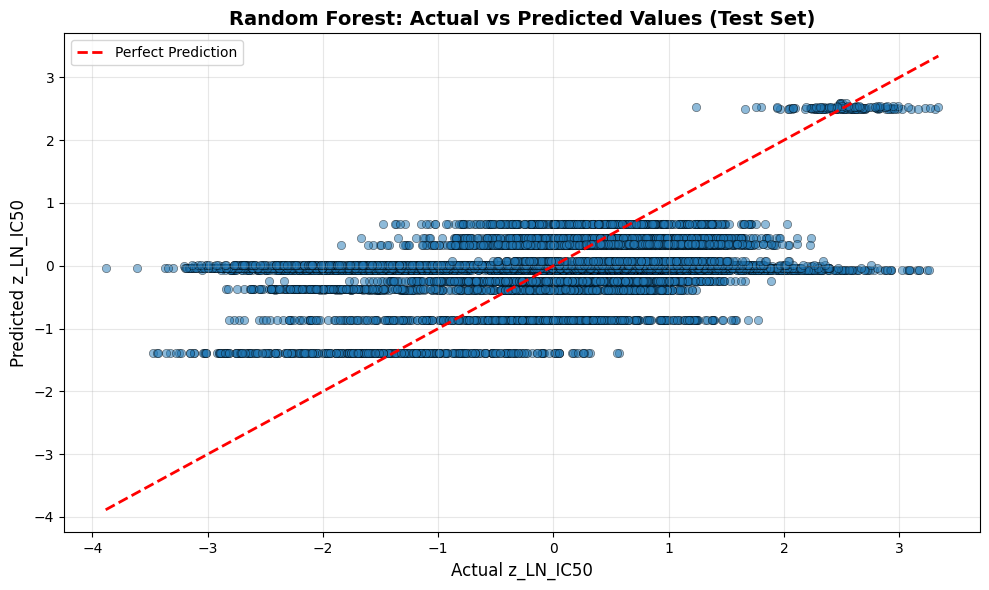


Residuals Statistics:
Mean Residual: 0.0846
Std Residual: 0.9134
Min Residual: -3.8439
Max Residual: 3.3345


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

# Create Random Forest model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with cross-validation
print("Performing Grid Search for Random Forest hyperparameters...")
print("This may take a few minutes...")

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# Use the best model
rf_model = grid_search.best_estimator_

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Performance:")
print(f"Train RMSE: {train_rmse_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Train R²: {train_r2_rf:.4f}")
print(f"Test R²: {test_r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['DRUG_ID', 'COSMIC_ID'],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(f"\nFeature Importance:")
print(feature_importance)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('Random Forest: Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
residuals_rf = y_test - y_test_pred_rf
print(f"\nResiduals Statistics:")
print(f"Mean Residual: {residuals_rf.mean():.4f}")
print(f"Std Residual: {residuals_rf.std():.4f}")
print(f"Min Residual: {residuals_rf.min():.4f}")
print(f"Max Residual: {residuals_rf.max():.4f}")

# Model Training for z_AUC Prediction

Now we train all models to predict z_AUC instead of z_LN_IC50

### Data preparation for z_AUC prediction

In [10]:
# Prepare target variable for z_AUC prediction
y_train_auc = train_df_unseen_pairs['z_AUC']
y_test_auc = test_df_unseen_pairs['z_AUC']

print(f"Training samples: {len(y_train_auc)}")
print(f"Test samples: {len(y_test_auc)}")

Training samples: 550895
Test samples: 24302


### Random Forest and Hyper Parameter Tuning for z_AUC

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 5, 'n_estimators': 200}
Best CV RMSE: 1.0211
Best params: {'max_depth': 5, 'n_estimators': 200}
Best CV RMSE: 1.0211
Random Forest (z_AUC):
Train RMSE: 0.9444, Test RMSE: 0.9427
Train R²: 0.1114, Test R²: 0.0285
Random Forest (z_AUC):
Train RMSE: 0.9444, Test RMSE: 0.9427
Train R²: 0.1114, Test R²: 0.0285


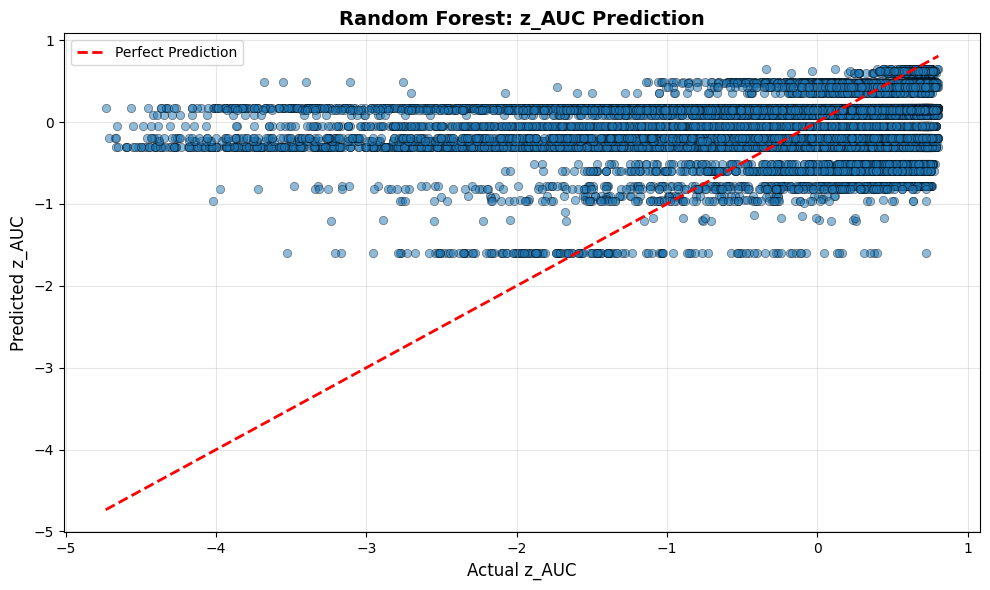

In [11]:
# Random Forest for z_AUC
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_auc = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_auc = GridSearchCV(rf_base_auc, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_auc.fit(X_train, y_train_auc)

print(f"Best params: {grid_search_rf_auc.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_auc.best_score_):.4f}")

rf_model_auc = grid_search_rf_auc.best_estimator_
y_train_pred_rf_auc = rf_model_auc.predict(X_train)
y_test_pred_rf_auc = rf_model_auc.predict(X_test)

train_rmse_rf_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_rf_auc))
test_rmse_rf_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_rf_auc))
train_r2_rf_auc = r2_score(y_train_auc, y_train_pred_rf_auc)
test_r2_rf_auc = r2_score(y_test_auc, y_test_pred_rf_auc)

print("Random Forest (z_AUC):")
print(f"Train RMSE: {train_rmse_rf_auc:.4f}, Test RMSE: {test_rmse_rf_auc:.4f}")
print(f"Train R²: {train_r2_rf_auc:.4f}, Test R²: {test_r2_rf_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_rf_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('Random Forest: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Training for y_weighted_0.25 Prediction

Now we train all models to predict y_weighted_0.25 (weighted combination: 0.25 * z_LN_IC50 + 0.75 * z_AUC)

### Data preparation for y_weighted_0.25 prediction

In [12]:
# Prepare target variable for y_weighted_0.25 prediction
y_train_weighted = train_df_unseen_pairs['y_weighted_0.25']
y_test_weighted = test_df_unseen_pairs['y_weighted_0.25']

print(f"Training samples: {len(y_train_weighted)}")
print(f"Test samples: {len(y_test_weighted)}")
print(f"\nTarget statistics:")
print(f"Mean: {y_train_weighted.mean():.4f}")
print(f"Std: {y_train_weighted.std():.4f}")

Training samples: 550895
Test samples: 24302

Target statistics:
Mean: -0.0005
Std: 0.9539


### Random Forest and Hyper Parameter tuning for y_weighted_0.25

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 10, 'n_estimators': 100}
Best CV RMSE: 1.0132
Best params: {'max_depth': 10, 'n_estimators': 100}
Best CV RMSE: 1.0132
Random Forest (y_weighted_0.25):
Train RMSE: 0.7525, Test RMSE: 0.7765
Train R²: 0.3777, Test R²: 0.2715
Random Forest (y_weighted_0.25):
Train RMSE: 0.7525, Test RMSE: 0.7765
Train R²: 0.3777, Test R²: 0.2715


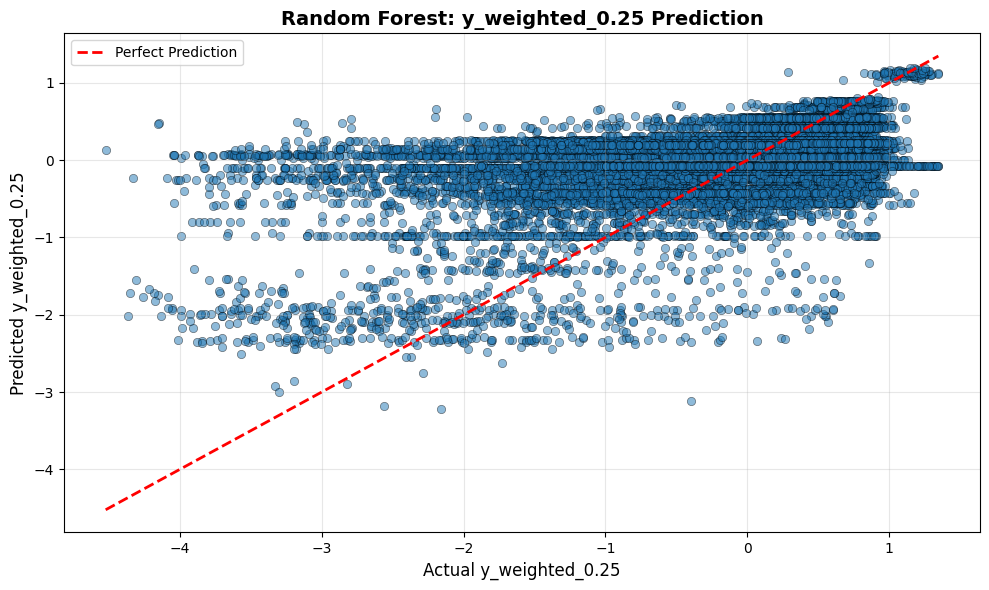

In [13]:
# Random Forest for y_weighted_0.25
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_weighted = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_weighted = GridSearchCV(rf_base_weighted, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_weighted.fit(X_train, y_train_weighted)

print(f"Best params: {grid_search_rf_weighted.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_weighted.best_score_):.4f}")

rf_model_weighted = grid_search_rf_weighted.best_estimator_
y_train_pred_rf_weighted = rf_model_weighted.predict(X_train)
y_test_pred_rf_weighted = rf_model_weighted.predict(X_test)

train_rmse_rf_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_rf_weighted))
test_rmse_rf_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_rf_weighted))
train_r2_rf_weighted = r2_score(y_train_weighted, y_train_pred_rf_weighted)
test_r2_rf_weighted = r2_score(y_test_weighted, y_test_pred_rf_weighted)

print("Random Forest (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_rf_weighted:.4f}, Test RMSE: {test_rmse_rf_weighted:.4f}")
print(f"Train R²: {train_r2_rf_weighted:.4f}, Test R²: {test_r2_rf_weighted:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_rf_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('Random Forest: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Training for Sensitivity Prediction

Now we train all models to predict sensitivity (average of z_IC50_sens and z_AUC)

### Data preparation for sensitivity prediction

In [14]:
# Prepare target variable for sensitivity prediction
y_train_sens = train_df_unseen_pairs['sensitivity']
y_test_sens = test_df_unseen_pairs['sensitivity']

print(f"Training samples: {len(y_train_sens)}")
print(f"Test samples: {len(y_test_sens)}")
print(f"\nTarget statistics:")
print(f"Mean: {y_train_sens.mean():.4f}")
print(f"Std: {y_train_sens.std():.4f}")

Training samples: 550895
Test samples: 24302

Target statistics:
Mean: -0.0012
Std: 0.9373


### Random Forest and Hyper Parameter Tuning for sensitivity

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 10, 'n_estimators': 100}
Best CV RMSE: 1.0734
Best params: {'max_depth': 10, 'n_estimators': 100}
Best CV RMSE: 1.0734
Random Forest (sensitivity):
Train RMSE: 0.7046, Test RMSE: 0.7132
Train R²: 0.4349, Test R²: 0.3651
Random Forest (sensitivity):
Train RMSE: 0.7046, Test RMSE: 0.7132
Train R²: 0.4349, Test R²: 0.3651


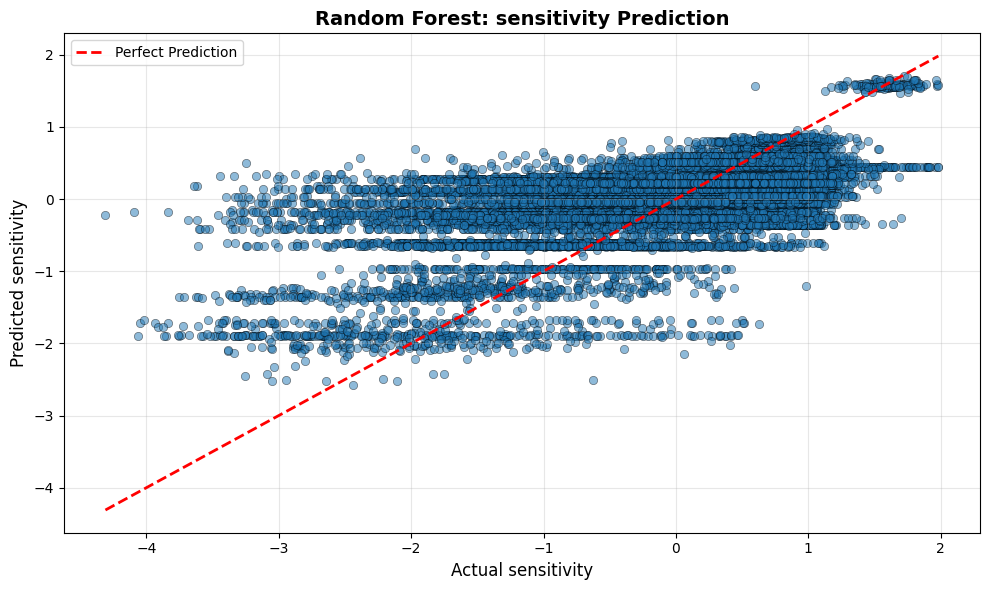

In [15]:
# Random Forest for sensitivity
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_sens = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_sens = GridSearchCV(rf_base_sens, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_sens.fit(X_train, y_train_sens)

print(f"Best params: {grid_search_rf_sens.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_sens.best_score_):.4f}")

rf_model_sens = grid_search_rf_sens.best_estimator_
y_train_pred_rf_sens = rf_model_sens.predict(X_train)
y_test_pred_rf_sens = rf_model_sens.predict(X_test)

train_rmse_rf_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_rf_sens))
test_rmse_rf_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_rf_sens))
train_r2_rf_sens = r2_score(y_train_sens, y_train_pred_rf_sens)
test_r2_rf_sens = r2_score(y_test_sens, y_test_pred_rf_sens)

print("Random Forest (sensitivity):")
print(f"Train RMSE: {train_rmse_rf_sens:.4f}, Test RMSE: {test_rmse_rf_sens:.4f}")
print(f"Train R²: {train_r2_rf_sens:.4f}, Test R²: {test_r2_rf_sens:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_rf_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('Random Forest: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Model Performance Summary

Comparison of Random Forest for all target variables

In [16]:
# Create comprehensive summary table for Random Forest only
summary_data = {
    'Target': ['z_LN_IC50', 'z_AUC', 'y_weighted_0.25', 'sensitivity'],
    'Train RMSE': [
        train_rmse_rf,
        train_rmse_rf_auc,
        train_rmse_rf_weighted,
        train_rmse_rf_sens
    ],
    'Test RMSE': [
        test_rmse_rf,
        test_rmse_rf_auc,
        test_rmse_rf_weighted,
        test_rmse_rf_sens
    ],
    'Train R²': [
        train_r2_rf,
        train_r2_rf_auc,
        train_r2_rf_weighted,
        train_r2_rf_sens
    ],
    'Test R²': [
        test_r2_rf,
        test_r2_rf_auc,
        test_r2_rf_weighted,
        test_r2_rf_sens
    ]
}

summary_df = pd.DataFrame(summary_data)

# Round values for better readability
summary_df['Train RMSE'] = summary_df['Train RMSE'].round(4)
summary_df['Test RMSE'] = summary_df['Test RMSE'].round(4)
summary_df['Train R²'] = summary_df['Train R²'].round(4)
summary_df['Test R²'] = summary_df['Test R²'].round(4)

print("=" * 80)
print("RANDOM FOREST MODEL PERFORMANCE SUMMARY - Unseen Cell Line-Drug Pairs Split")
print("=" * 80)
print()
print(summary_df.to_string(index=False))
print()

# Find best performing target
best_target = summary_df.loc[summary_df['Test RMSE'].idxmin()]
print("=" * 80)
print("BEST PERFORMING TARGET (Based on Test RMSE):")
print("=" * 80)
print(f"Target: {best_target['Target']}")
print(f"Test RMSE: {best_target['Test RMSE']:.4f}")
print(f"Test R²: {best_target['Test R²']:.4f}")
print("=" * 80)

RANDOM FOREST MODEL PERFORMANCE SUMMARY - Unseen Cell Line-Drug Pairs Split

         Target  Train RMSE  Test RMSE  Train R²  Test R²
      z_LN_IC50      0.9410     0.9173    0.1172   0.0947
          z_AUC      0.9444     0.9427    0.1114   0.0285
y_weighted_0.25      0.7525     0.7765    0.3777   0.2715
    sensitivity      0.7046     0.7132    0.4349   0.3651

BEST PERFORMING TARGET (Based on Test RMSE):
Target: sensitivity
Test RMSE: 0.7132
Test R²: 0.3651
